# OLAP Query Visualization
This notebook visualizes the results of our OLAP queries from the retail data warehouse.

<Figure size 2000x1000 with 0 Axes>

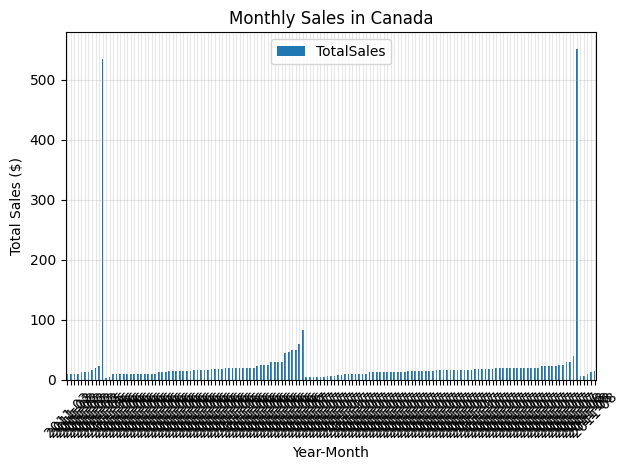


Sales Summary for Canada:
Total Sales: $3,666.38
Average Monthly Sales: $24.28
Number of Months: 151

Database connection closed.


In [21]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect(r'C:\Users\flags\End-sem DSA 2040\DSA-2040_Practical_Exam_PatriciaKiarie781\Data Warehousing\ETL_Process\retail_dw.db')

#--- Drill-down: Sales details for a specific country by month
drilldown_query = '''
SELECT s.InvoiceNo, s.InvoiceDate, s.TotalSales, strftime('%Y-%m', s.InvoiceDate) AS YearMonth
FROM SalesFact s
JOIN CustomerDim c ON s.CustomerID = c.CustomerID
WHERE c.Country = 'Canada'
ORDER BY YearMonth, s.InvoiceNo;
'''

try:
    # Execute query and load into DataFrame
    drilldown_df = pd.read_sql_query(drilldown_query, conn)
    
    if len(drilldown_df) > 0:
        # Set YearMonth as index for plotting
        drilldown_df.set_index('YearMonth', inplace=True)
        
        # Create the plot
        plt.figure(figsize=(20, 10))
        drilldown_df.plot(kind='bar', y='TotalSales')
        plt.title('Monthly Sales in Canada')
        plt.ylabel('Total Sales ($)')
        plt.xlabel('Year-Month')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        
        # Save the plot
        plt.savefig(r'C:\Users\flags\End-sem DSA 2040\DSA-2040_Practical_Exam_PatriciaKiarie781\Data Warehousing\Olap_queries\canada_monthly_sales.png')
        plt.show()
        
        print("\nSales Summary for Canada:")
        print(f"Total Sales: ${drilldown_df['TotalSales'].sum():,.2f}")
        print(f"Average Monthly Sales: ${drilldown_df['TotalSales'].mean():,.2f}")
        print(f"Number of Months: {len(drilldown_df)}")
    else:
        print("No sales data found for Canada")
        
except Exception as e:
    print(f"Error executing query: {str(e)}")
    
finally:
    conn.close()
    print("\nDatabase connection closed.")